In [191]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
df = pd.read_csv('data.csv')

In [193]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [194]:
print(df.isnull().sum())
#df = df.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [195]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [196]:
df.fillna(value=0,inplace=True)

<AxesSubplot:xlabel='Label', ylabel='count'>

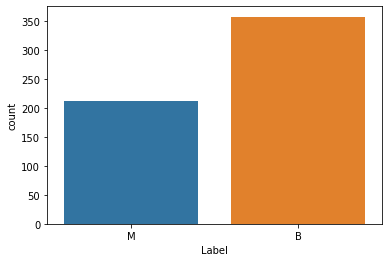

In [197]:
#Understand the data 
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [198]:
####### Replace categorical values with numbers########
#print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#Y = labelencoder.fit_transform(y) # M=1 and B=0
#print("Labels after encoding are: ", np.unique(Y))

Labels before encoding are:  ['B' 'M']


In [199]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Labels after encoding are:  [0 1]


In [200]:
#Y = df.Label.values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [201]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
# X = df.drop(labels = ["Label", "id"], axis=1) 
#print(X.describe().T) #Needs scaling
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data and column with least ranks
X = df.drop(labels = ["Label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [202]:
feature_names = np.array(X.columns)

In [203]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
#print(X)  #Scaled values

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [205]:
#boruta can use any one of xgboost and random forrest
import xgboost as xgb
model = xgb.XGBClassifier()

In [206]:
from boruta import BorutaPy

In [207]:
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2,random_state=1)

In [208]:
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	14
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	14
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	14
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	18
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	18
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	18
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	10
Rejected: 	18
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	9
Rejecte

BorutaPy(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None, gpu_id=None,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 n_estimators=44, n_jobs=None,
     

In [209]:
feat_selector.ranking_

array([ 6,  1, 21,  2, 13, 16, 12,  1, 18, 19,  3,  6,  2,  8,  9, 10,  6,
       17, 13,  4,  1,  1,  1,  1, 10, 21,  2,  1, 15, 21, 23])

In [210]:
feature_ranks = list(zip(feature_names,
                         feat_selector.support_,
                         feat_selector.support_))

In [211]:
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {}, keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: radius_mean                    Rank: False, keep: False
Feature: texture_mean                   Rank: True, keep: True
Feature: perimeter_mean                 Rank: False, keep: False
Feature: area_mean                      Rank: False, keep: False
Feature: smoothness_mean                Rank: False, keep: False
Feature: compactness_mean               Rank: False, keep: False
Feature: concavity_mean                 Rank: False, keep: False
Feature: concave points_mean            Rank: True, keep: True
Feature: symmetry_mean                  Rank: False, keep: False
Feature: fractal_dimension_mean         Rank: False, keep: False
Feature: radius_se                      Rank: False, keep: False
Feature: texture_se                     Rank: False, keep: False
Feature: perimeter_se                   Rank: False, keep: False
Feature: area_se                        Rank: False, keep: False
Feature: smoothness_se                  Rank: False, keep: False
Feature: compactness_se      

In [212]:
df.columns

Index(['id', 'Label', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [213]:
X_filtered = feat_selector.transform(X_train)

In [214]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data and column with least ranks
X = df.drop(labels = ["Label", "id","perimeter_mean","smoothness_mean","area_mean","perimeter_se","compactness_mean","concavity_mean","symmetry_mean","fractal_dimension_mean","concave points_se","symmetry_se","compactness_worst","concavity_worst","symmetry_worst","fractal_dimension_worst","Unnamed: 32"], axis=1) 
#print(X.describe().T) #Needs scaling

                      count        mean         std         min         25%  \
radius_mean           569.0   14.127292    3.524049    6.981000   11.700000   
texture_mean          569.0   19.289649    4.301036    9.710000   16.170000   
concave points_mean   569.0    0.048919    0.038803    0.000000    0.020310   
radius_se             569.0    0.405172    0.277313    0.111500    0.232400   
texture_se            569.0    1.216853    0.551648    0.360200    0.833900   
area_se               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness_se         569.0    0.007041    0.003003    0.001713    0.005169   
compactness_se        569.0    0.025478    0.017908    0.002252    0.013080   
concavity_se          569.0    0.031894    0.030186    0.000000    0.015090   
fractal_dimension_se  569.0    0.003795    0.002646    0.000895    0.002248   
radius_worst          569.0   16.269190    4.833242    7.930000   13.010000   
texture_worst         569.0   25.677223    6.146258 

<AxesSubplot:xlabel='Label', ylabel='count'>

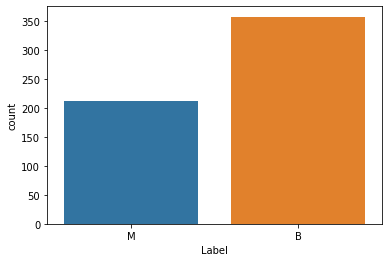

In [215]:
#Understand the data 
sns.countplot(x="Label", data=df) #1 - malignant   0 - benign

In [216]:
#X = df.drop(labels = ["Label", "id","radius_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","smoothness_worst","compactness_worst","concavity_worst","symmetry_worst","fractal_dimension_worst","Unnamed: 32"], axis=1) 
#print(X.describe().T) #Needs scaling

In [217]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 16)
Shape of testing data is:  (143, 16)


In [218]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

In [219]:
model = Sequential()
#model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(16, input_dim=16, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [220]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=60, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 2s 91ms/step - loss: 205.4380 - accuracy: 0.3709 - val_loss: 184.7793 - val_accuracy: 0.3776
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 188.0037 - accuracy: 0.3709 - val_loss: 172.4865 - val_accuracy: 0.3776
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 174.5819 - accuracy: 0.3709 - val_loss: 160.4719 - val_accuracy: 0.3776
Epoch 4/100
8/8 [==============================] - 0s 25ms/step - loss: 164.8356 - accuracy: 0.3709 - val_loss: 148.9503 - val_accuracy: 0.3776
Epoch 5/100
8/8 [==============================] - 0s 20ms/step - loss: 152.3747 - accuracy: 0.3709 - val_loss: 137.8984 - val_accuracy: 0.3776
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 138.5894 - accuracy: 0.3709 - val_loss: 128.1320 - val_accuracy: 0.3776
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 129.6652 - accuracy: 0.3709 - val_loss: 119.7175 - val_accuracy:

8/8 [==============================] - 0s 17ms/step - loss: 3.8049 - accuracy: 0.7254 - val_loss: 0.5850 - val_accuracy: 0.8671
Epoch 59/100
8/8 [==============================] - 0s 32ms/step - loss: 3.6354 - accuracy: 0.6925 - val_loss: 0.8428 - val_accuracy: 0.8252
Epoch 60/100
8/8 [==============================] - 0s 14ms/step - loss: 3.5401 - accuracy: 0.7160 - val_loss: 0.9470 - val_accuracy: 0.8042
Epoch 61/100
8/8 [==============================] - 0s 13ms/step - loss: 3.2750 - accuracy: 0.7418 - val_loss: 0.5485 - val_accuracy: 0.8601
Epoch 62/100
8/8 [==============================] - 0s 11ms/step - loss: 3.8599 - accuracy: 0.6925 - val_loss: 0.4247 - val_accuracy: 0.8601
Epoch 63/100
8/8 [==============================] - 0s 13ms/step - loss: 3.0716 - accuracy: 0.7394 - val_loss: 0.4147 - val_accuracy: 0.8531
Epoch 64/100
8/8 [==============================] - 0s 12ms/step - loss: 2.4000 - accuracy: 0.7465 - val_loss: 0.4310 - val_accuracy: 0.8531
Epoch 65/100
8/8 [========

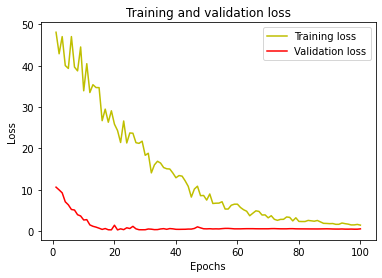

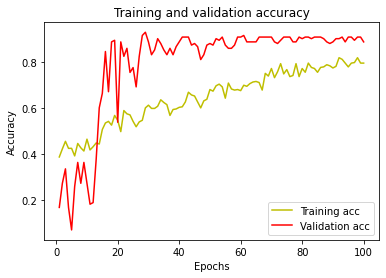

In [153]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 4ms/step


<AxesSubplot:>

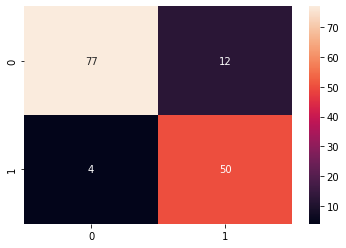

In [154]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)